# Otimização - Design do Experimento (DOE)

### Imports

In [60]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
#import plotly.express as px
from tqdm import tqdm
pd.set_option('max.columns',500)
%matplotlib inline
from IPython.display import Image

import matplotlib
from IPython.core.display import HTML
from IPython.display import Image
import re
from unidecode import unidecode as und
import pickle
import seaborn as sns

O Design do Experimento (DOE) é uma área que reúne técnicas que visam guiar escolhas do experimento para que a otimização seja feita de forma eficiente.

## 1. Definições

Durante o DOE, existem algumas terminologias que definem pontos importantes do processo:

* <u>Fatores:</u> variáveis ou parâmetros do experimento;
    * podem ser **quantitativas ou qualitativas**;
    * pra algumas técnicas, precisam ser **discretas** (variáveis contínuas devem ser discretizadas), para outras não;
    * o número de fatores **deve ser pequeno**, devido à limitações do processo.
* <u>Level:</u> número de valores que uma determinada variável (já discretizada) pode assumir;
* <u>Região de interesse:</u> intervalo de interesse de variação de cada variável;
* <u>Variável resposta:</u> espaço de estados da função objetivo;

## 2. Técnicas

As técnicas de DOE são técnicas estatísticas, isto é, as técnicas apresentam estratégias para se investigar a influência dos fatores no resultado final, mas os resultados são extraídos a partir de análises estatísticas. 

Neste notebook, não explicaremos a fundo as análises que costumam ser feitas após as técnicas de DOE, por entender que este é outro assunto amplo e que deve ser objeto de outro estudo. Entretanto, deixaremos algumas referências para que o assunto seja aprofundado e para que os exemplos de aplicação sejam melhor entendidos.

### 2.1 Randomized Complete Block Design (RCBD)

É uma técnica baseada em ***blocking***, isto é, que tenta bloquear a influência de um fator para mensurar a influência que os demais fatores produzem na variável resposta. Geralmente, análise é feita em cima do fator que parece ser o mais relevante pro problema, de forma que este é chamado de **fator primário** e os outros de **fatores de incômodo**.

**O funcionamento é simples: todos os fatores de incômodo são mantidos constantes e o fator primário é variado para que seja medida a influência que este causou na variável resposta. Esse processo é repetido para todas as combinações possíveis de fatores de incômodo**

Assim, supondo um problema com $K$ fatores, $\mathcal{X} = \{X_1, ... , X_K\}$ em que os leveis dos fatores são denotados por $\mathcal{L} = \{L_1, ... , L_K\}$, são necessárias $N$ execuções do experimento, em que $N$ é definido como:

$$
N = L_1 \cdot L_2 \cdot ... \cdot L_K = \prod_1^K L_k
$$

A figura abaixo ilustra um exemplo simples da aplicação do RCBD.

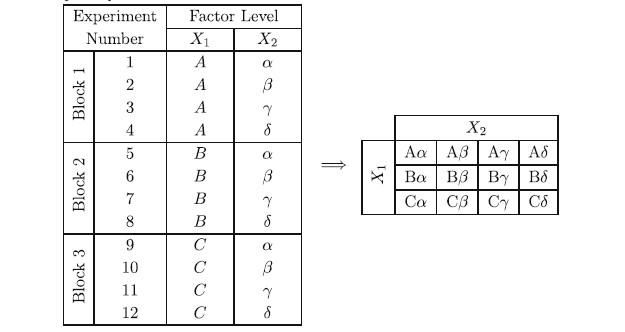

In [61]:
Image('assets/tabela_RCBD.jpg')

O RCBD possui a nítida limitação quanto ao número de fatores ($K$) e ao level ($L_k$) delas, já que a dimensionalidade do problema, e consequentemente o número de experimentos necessários, aumenta muito rapidamente em função dessas duas variáveis. 

A figura ilustra esse aumento ao se adicionar uma única variável com level mínimo (igual a 2) ao experimento.

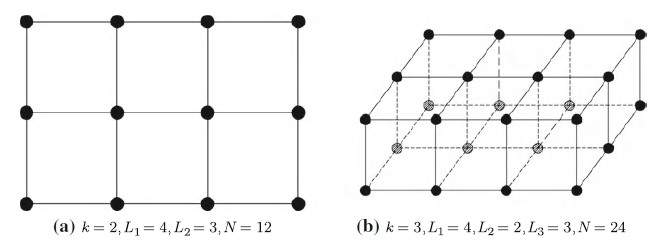

In [62]:
Image('assets/imagem_RCBD.jpg')

Apesar de, idealmente, o RCBD necessitar do mapeamento completo do espaço de estado (com todos os leveis de todos os fatores), é possível utilizar essa técnica quando se tem uma amostra suficientemente grande em que todos os leveis das variáveis apareçam algumas vezes (por mais que nem todas as combinações de fatores apareçam).

O RCBD asume que a variável resposta pode ser descrita pela regressão:

$$
y_{i,j} = \mu + \tau_i + \beta_j + \epsilon_{i,j}
$$

em que $i$ representa o $i$-ésimo level do fator primário (um tratamento, na terminologia original da ANOVA), $j$ representa a $j$-ésima combinação dos  fatores de incômodo (um bloco, na terminologia original da ANOVA), $y_{i,j}$ é a variável resposta para o $i$-ésimo level do fator primário e para a $j$-ésima combinação dos fatores de incômodo, $\mu$ é a média geral das variáveis resposta, $\tau_i$ é o efeito do fator primário, $\beta_i$ é o efeito da combinação dos fator de incômodo e $\epsilon_{i,j}$ é a modelagem de um ruído qualquer gaussiano.

Considerando essa hipótese, é necessário medir se os fatores são realmente significantes. Para isso, é muito comum utilizar análise de variâncias para determinar se um fator é significante ou não para o resultado da variável resposta. Isso pode ser feito por meio da tabela ANOVA, em que estima-se o p-valor e a F-estatística para medir a significância de um fator. As referências abaixo aprofundam o tema:
* Análise de variâncias: [ANOVA Explained by Example](https://towardsdatascience.com/anova-explained-with-an-example-4a8c9699b175) e [The Analysis of Variance](https://files.cercomp.ufg.br/weby/up/56/o/DOE_P4_anova.pdf)
* RCDB: [RCDB (até slide 24)](https://files.cercomp.ufg.br/weby/up/56/o/DOE_P5_blocking.pdf)

### 2.2 Latin Square

Motivado pelo aumento de dimensionalidade do RCBD, o Latin Square surgiu como uma adaptação deste. A principal modificação é a não execução de todas as combinações possíveis dos fatores de incômodo com os fatores primários, ao invés disso, **a ideia básica é combinar cada level do fator primário com cada level dos fatores de incômodo, por mais que não sejam em combinações diferentes**. É mais fácil entender a técnica pela figura abaixo:

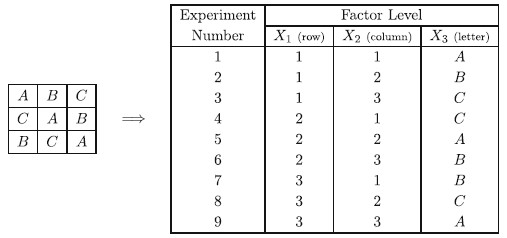

In [63]:
Image('assets/tabela_latin.jpg')

Diferente do RCBD, o Latin Square exige que todos os fatores tenham level ($L$) igual. Assim, supondo um problema com $K$ fatores, $\mathcal{X} = \{X_1, ... , X_K\}$, cada um com $L$ leveis, no Latin Square, $N$ é calculada por:

$$
N = L^2
$$

Dessa forma, o Latin Square é uma técnica cuja dimensionalidade não depende do número de fatores, e, por isso, **é indicado para situações em que existem muitos parâmetros**. Por outro lado, é **fortemente suscetível ao aumento de leveis das variáveis**.

A figura abaixo ilustra o espaço de amostras de um exemplo em que se aplicou a técnica.

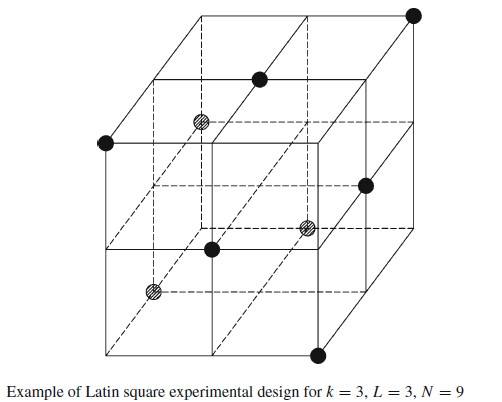

In [64]:
Image('assets/imagem_latin.jpg')

Assim como para o RCBD, é muito comum utilizar análise de variâncias após o Latin Square. As referências abaixo aprofundam o tema:
* Análise de variâncias: [ANOVA Explained by Example](https://towardsdatascience.com/anova-explained-with-an-example-4a8c9699b175) e [The Analysis of Variance](https://files.cercomp.ufg.br/weby/up/56/o/DOE_P4_anova.pdf)
* Latin Square: [Latin Square (slide 25 ao 39)](https://files.cercomp.ufg.br/weby/up/56/o/DOE_P5_blocking.pdf)

### 2.3 Full Factorial

A técnica Full Factorial pode ser entendido como uma extensão da RCBD, no sentido que nessa técnica não se deseja focar na influência de apenas um fator, mas sim na influência que todos os fatores e a combinações dos fatores exercem sobre a variável resposta. A figura abaixo ilustra um exemplo de uso.

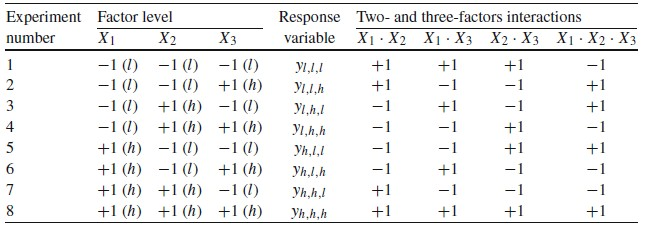

In [65]:
Image('assets/tabela_full_fac.jpg')

O Full Factorial é uma técnica **ortogonal**, no sentido que o produto dos fatores dos experimentos analisados, ou seja, o produto das colunas da tabela acima, é igual a 0.

Uma variável importante pra análise do Full Factorial é a chamada **principal interação**, denotada pela letra $M$. Essa variável é calculada pra cada fator do experimento. Supondo que estejamos calculando pra $X_1$, **é definida como a soma dos desvios pra média da variável resposta para todos os leveis possíveis**. Matematicamente:

$$
M_{X_1} = \sum_{i=1}^{L_1}(\mathbb{E}(y|X_1=i) - \mathbb{E}(y))^2
$$

A equação acima pode ser estendida para $X_2$ e $X_3$ até $X_K$.

Assim, a análise acima pode ser estendida para as combinações de fatores, de forma que a variável acaba sendo denominada **efeito de interação**, que pode ser definida, matematicamente, como:

$$
M_{X_1, X_2} = \sum_{i=1}^{L_1}\sum_{j=1}^{L_2}(\mathbb{E}(y|X_1=i, X_2=j) - \mathbb{E}(y))^2 - (M_{X_1} + M_{X_2})
$$

Assim, esses fatores estimam a influência que cada fator e suas combinações exercem sobre a variável resposta.

Como mostrado na figura acima, as combinações dos fatores podem ser de 1, 2 ou 3 elementos. De maneira mais geral, em um problema com $K$ variáveis, o número de interações possíveis segue a fórmula do triângulo de Pascal, que é dado por:

$$
n_{K,j} = \binom{K}{j} = \frac{K!}{j!(K-j)!}
$$

em que $n_{K,j}$ é o número de combinações com $j$ fatores e $K$ é o número de fatores do problema.

Repare que **o $N$ dessa técnica é igual ao do RCBD, ou seja, o produto dos leveis de todos os fatores**. Isso ocorre por essa técnica também explorar todas as combinações possíveis de fatores.

Por esse motivo, surgiram outras técnicas que tentaram solucionar essa dificuldade, como a **Fractional Factorial** ou o **Taguchi**. Nesse estudo, não vamos detalhar essas técnicas, mas elas estão explicadas na principal referência desse notebook.

Assim como para o RCBD e para o Latin Square, é comum utilizar análise de variâncias após o Full Factorial. As referências abaixo aprofundam o tema:
* Análise de variâncias: [ANOVA Explained by Example](https://towardsdatascience.com/anova-explained-with-an-example-4a8c9699b175) e [The Analysis of Variance](https://files.cercomp.ufg.br/weby/up/56/o/DOE_P4_anova.pdf)
* Full Factorial: [Factorial Designs](https://files.cercomp.ufg.br/weby/up/56/o/DOE_P6_factorial_design.pdf)

### 2.4 Space Filling

As técnicas apresentadas acima usam grandezas estatísticas pra fazer o design do experimento. Outra abordagem possível são as técnicas de *space filling*, que não são baseadas na ideia de "leveis" dos fatores e, até por isso, **não exigem que os fatores sejam discretos**.

A técnica mais básica de *space filling* é o Random, que consistem em se coletar amostras dos fatores através de uma distribuição uniforme. Entretanto, essa técnica é pouco eficiente e pode não varrer diversas partes do espaço de soluções.

Existem outras técnicas de *space filling*, em que se destacam aquelas baseadas em **geração de números pseudo-randômicos**, como as sequências de Halton, Faure e Sobol. Entretanto, a modelagem matemática dessas técnicas são mais complexas, envolvendo séries numéricas de baixa discrepância. A principal referência desse notebook apresenta essas 3 técnicas e mais algumas, para aqueles que quiserem explorá-las.

## 3. Aplicação

### 3.1 Redefinição do problema

Para testar as técnicas, usaremos o problema de exemplo do notebook de "Introdução" e a classe que foi criada nele, para especificação do ambiente de otimização. Caso não lembre do problema, recomendamos que releiam a Seção 3 da Introdução.

In [66]:
class Ambiente():
    '''
    Classe que define o ambiente de simulação do problema em questão, que é o de definir
    como será feita a alocação de produção de carros por fábrica, dado que cada uma delas
    tem custos e tempo de produção próprios.
    '''
    def __init__(self, D, lambda_1=1, lambda_2=1):
        '''
        Inicialização do ambiente

        Parâmetros:
        -----------
            1. D {int}:
                Número de carros que precisam ser produzidos;
            2. lambda_1 e lambda_2 {float}:
                Parâmetros de ajuste das funções subobjetivo.
        '''
        #Definição dos atibutos da classe
        self.D, self.lambda_1, self.lambda_2 = D, lambda_1, lambda_2

        self.n_fabricas = 3
        self.custo_por_carro = np.array([50, 30, 10]) #em milhares de reais
        self.tempo_por_carro = np.array([1, 5, 10]) #em dias
        
        #Cálculo do custo máximo e mínimo e do tempo máximo e mínimo de produção dada a demanda D
        self.max_custo, self.min_tempo = self.compute_costs([0,0,self.D])
        self.min_custo, self.max_tempo = self.compute_costs([self.D,0,0])

    def norm(self, valor, maximo, minimo):
        '''
        Função de normalização máximo e mínimo

        Parâmetros:
        -----------
            1. valor {float}:
                Valor a ser normalizado;
            2. maximo {float}:
                valor máximo da variável;
            3. minimo {float}:
                valor mínimo da variável.

        Saída:
        ------
            1. valor_normalizado {float}:
                Valor normalizado.
        '''
        valor_normalizado = (valor - minimo) / (maximo - minimo)
        return valor_normalizado

    def compute_costs(self, alocacao):
        '''
        Função que calcula o custo de produção e o tempo, dada uma determinada alocação.

        Parâmetros:
        -----------
            1. alocacao {list ou np.array}:
                Alocação definindo quantos carros cada fábrica produzirá.
        
        Saídas:
        -------
            1. custo_pedido {float}:
                Custo de produção, em milhares de reais;
            2. tempo_pedido {float}:
                Tempo de produção, em dias.
        '''
        #Transforma a entrada em um np.array
        alocacao = np.array(alocacao)

        # Dada a alocação, calcula o custo e o tempo de produção
        custo_pedido = np.sum(alocacao*self.custo_por_carro)
        tempo_pedido = np.sum(alocacao*self.tempo_por_carro)

        return custo_pedido, tempo_pedido

    def r(self, f1, f2, omega_1, omega_2):
        '''
        Executa o cálculo de r

        Parâmetros:
        -----------
            1. f1 e f2 {float}:
                Funções subobjetivo.
            2. omega_1, omega_2 {float}:
                Pesos das funções subobjetivos.

        Saída:
        ------

            1. f {float}:
                Valor da função objetivo
        '''
        
        f = omega_1*f1 + omega_2*f2
        return f
        
    def funcao_objetivo(self, alocacao, omega_1, omega_2):
        '''
        Calcula a função objetivo.

        Parâmetros:
        -----------
            1. alocacao {list ou np.array}:
                Alocação definindo quantos carros cada fábrica produzirá.
            2. omega_1, omega_2 {float}:
                pesos dos subobjetivos. A soma dos dois precisa ser igual a 1.

        Saída:
        ------
            1. objetivo {float}:
                Resultado da função objetivo.
        '''
        #Cálculo do custo e o tempo demandado
        custo, tempo = self.compute_costs(alocacao)

        #Cálculo das funções subpbjetivo
        f1, f2 = self.lambda_1*custo, self.lambda_2*tempo

        #Normalização dessas funções usando o custo e tempo máximo e mínimo
        f1_norm, f2_norm = self.norm(f1, self.min_custo, self.max_custo), self.norm(f2, self.min_tempo, self.max_tempo)

        #Cálculo da função objetivo (o negativo é porque o problema é de minimzação)
        objetivo = -self.r(f1_norm, f2_norm, omega_1, omega_2)
        
        if np.sum(alocacao) != self.D: #Penaliza as soluções cuja soma seja maior ou menor que D
            objetivo = -(np.abs(np.sum(alocacao) - self.D))
            
        return objetivo

In [67]:
env = Ambiente(20)

### 3.2 Aplicação do RCBD

Para a execução do RCBD, iremos executar todas as combinações possíveis de alocação e mediremos a significância estatística através da Análise de Variâncias (ANOVA). Além dos 3 fatores de entrada (quanto cada uma das 3 fábricas irá produzir), adicionamos uma variável independente, que **NÃO** contamina o experimento, mas que vamos usar para nos certificarmos que a análise está conseguindo diferenciar fatores significantes (a alocação) de fatores insignificantes.

In [68]:
lista_a, lista_b, lista_c = [], [], []
lista_obj = []
lista_insignificante = []
np.random.seed(0)
for a in range(0, 21):
    for b in range(0, 21):
        for c in range(0, 21):
            insignificante = np.random.randint(0,21)
            lista_a.append(a)
            lista_b.append(b)
            lista_c.append(c)
            lista_obj.append(env.funcao_objetivo([a,b,c], 0.5, 0.5))
            lista_insignificante.append(insignificante)

df_rcbd = pd.DataFrame({'a':lista_a, 'b':lista_b, 'c':lista_c, 'insignificante':lista_insignificante, 'objetivo':lista_obj}) 
df_rcbd = df_rcbd.sample(frac=1).reset_index(drop=True) #Randomização da ordem do experimento

Após a coleta dos dados, o primeiro passo é tentar identificar como a variável objetivo se comporta para os diferentes leveis dos fatores analisados.

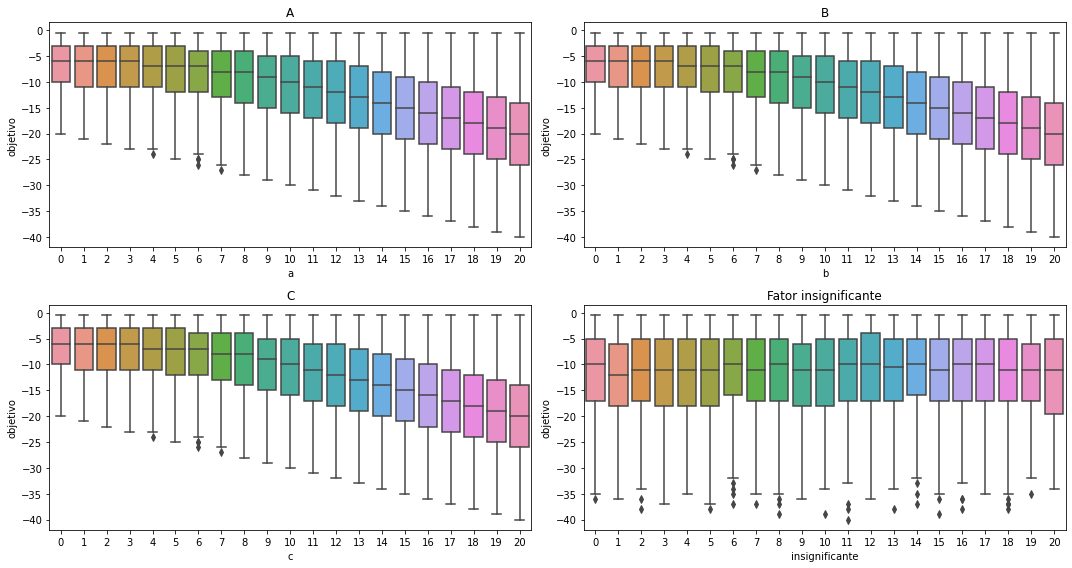

In [69]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.boxplot(data=df_rcbd, x='a', y='objetivo')
plt.title('A')


plt.subplot(2,2,2)
sns.boxplot(data=df_rcbd, x='b', y='objetivo')
plt.title('B')

plt.subplot(2,2,3)
sns.boxplot(data=df_rcbd, x='c', y='objetivo')
plt.title('C')

plt.subplot(2,2,4)
sns.boxplot(data=df_rcbd, x='insignificante', y='objetivo')
plt.title('Fator insignificante')

plt.tight_layout()
plt.show()

É possível perceber que o comportamento da variável objetivo em função de `A`, `B` e `C` é praticamente simétrico, o que é esperado pela natureza do problema, dado o alto nível de simetria entre esses 3 fatores. Por outro lado, para o fator insignificante, parece não haver um padrão de comportamento bem definido, assemelhando-se a um comportamento aleatório.

<u>Obs:</u> O gráfico acima ajuda na interpretabilidade do problema mas **NÃO** é suficiente para afirmar se um fator é significante para o problema ou não. Para identificar os fatores que são significantes, é necessário fazer uma análise estatística, em que geralmente se utiliza a tabela ANOVA.

### 3.3 Análise de significância

Como já mencionado, para fazer análise de significância, usaremos a Análise de Variâncias. Para gerar a tabela ANOVA, vamos usar a biblioteca `statsmodel`, como exemplificado na célula abaixo.

No exemplo abaixo, executaremos a análise considerando a alocação da primeira fábrica (`a`) como o fator primário e a alocação das demais fábricas (`b` e `c`) como os fatores de incômodo.

In [70]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('objetivo ~ C(a) + C(b):C(c)', data=df_rcbd).fit()
df_anova = sm.stats.anova_lm(model, typ=2)

display(df_anova)
print(f'Considerando nível de significânica de 5%: \n\
     F-crítico para \"a\": {stats.f.ppf(q=1-.05, dfn=df_anova.loc["C(a)","df"], dfd=df_anova.loc["Residual","df"])} \n\
     F-crítico para interação: {stats.f.ppf(q=1-.05, dfn=df_anova.loc["C(b):C(c)","df"], dfd=df_anova.loc["Residual","df"])}')

,sum_sq,df,F,PR(>F)
C(a),161276.909201,20.0,667.804216,0.0
C(b):C(c),360457.918290,440.0,67.843595,0.0
Residual,106261.443654,8800.0,NaN,NaN


Considerando nível de significânica de 5%: 
     F-crítico para "a": 1.5717183682924882 
     F-crítico para interação: 1.1166704941333476


Devemos interpretar as variáveis do resultado da seguinte forma:
* `C(a)`: fator primário;
* `C(b):C(c)`: interação dos fatores secundários;
* `Residual`: resíduo restante da combinação entre os 3 fatores;
* `sum_sq`: soma quadrática;
* `df`: grau de liberdade da variável analisada;
* `F`: F-estatística da variável;
* `PR(>F)`: p-valor da variável.

Passando pelos resultados, vemos que:
1. A soma quadrática para esse contexto não é tão importante;
2. No grau de liberdade, é possível perceber que para o fator primário o `df` é igual ao número de leveis dele menos 1 (21 - 1 = 20) e que para a combinação dos fatores de incômodo (`C(b):C(c)`) o `df` é igual à multiplicação dos leveis deles menos 1 (21*21 - 1 = 440).
3. O valor de **F** para o fator primário e para a interação dos fatores de incômodo é alto, muito maior do que os valores dos F-críticos.
4. O p-valor do fator primário é nulo, muito menor do que 0.05, nível de significância adotado em diversas fontes.

A partir dos resultados, considerando um nível de significância de 5%, vemos que o valor de F é menor do que o F-crítico para o fator avaliado e que o o p-valor é menor do que o nível de significância, **o que indica que esse fator é significante para a variável resposta**. Matematicamente:

$$
F(a) \geq F_{critico}(a) \\
p_a \leq 0.05 \\
\therefore \\
a \text{ é significante}
$$


De maneira menos rigorosa, é possível realizar essa análise para todos os fatores:

In [73]:
model = ols('objetivo ~ C(a) + C(b) + C(c) + C(insignificante)', data=df_rcbd).fit()
df_anova = sm.stats.anova_lm(model, typ=2)

display(df_anova)
print(f'Considerando nível de significânica de 5%: \n\
     F-crítico para \"a\": {stats.f.ppf(q=1-.05, dfn=df_anova.loc["C(a)","df"], dfd=df_anova.loc["Residual","df"])} \n\
     F-crítico para \"b\": {stats.f.ppf(q=1-.05, dfn=df_anova.loc["C(b)","df"], dfd=df_anova.loc["Residual","df"])} \n\
     F-crítico para \"c\": {stats.f.ppf(q=1-.05, dfn=df_anova.loc["C(c)","df"], dfd=df_anova.loc["Residual","df"])} \n\
     F-crítico para \"insignificante\": {stats.f.ppf(q=1-.05, dfn=df_anova.loc["C(insignificante)","df"], dfd=df_anova.loc["Residual","df"])}')

,sum_sq,df,F,PR(>F)
C(a),161053.758431,20.0,513.499802,0.000000
C(b),160931.370272,20.0,513.109583,0.000000
C(c),160784.452321,20.0,512.641154,0.000000
C(insignificante),219.353768,20.0,0.699382,0.830967
Residual,143960.474307,9180.0,NaN,NaN


Considerando nível de significânica de 5%: 
     F-crítico para "a": 1.5716688283390816 
     F-crítico para "b": 1.5716688283390816 
     F-crítico para "c": 1.5716688283390816 
     F-crítico para "insignificante": 1.5716688283390816


Aqui, percebemos que os resultados para `a`, `b` e `c` possuem p-valor nulo e F maior que os seus respectivos F-críticos, **mostrando que o modelo identificou que elas realmente são variáveis significantes**.

Já para a variável `insignificante`, criada pra testar o modelo, vemos que o p-valor é muito maior que 5% e que o F é menor do que o seu F-crítico, o que mostra que o modelo **identificou que essa variável NÃO é significante**.

<u>Obs:</u> se uma das condições não for satisfeita (tanto do p-valor quanto de F), não é possível afirmar que a variável é significante.

### 3.4 Investigação de outros resultados

Após analisar os resultados de significância, é preciso investigar se o modelo fitando as curvas de maneira adequada. Para isso, será gerado o dataframe `results`.

In [74]:
results = pd.concat((df_rcbd, model.fittedvalues), axis=1)
results = results.rename(columns={0:'fitado'})

A partir desse DataFrame, serão plotadas duas curvas:
* A fitagem do modelo em comparação com a variável objetivo; e
* A distribuição dos resíduos do modelo.

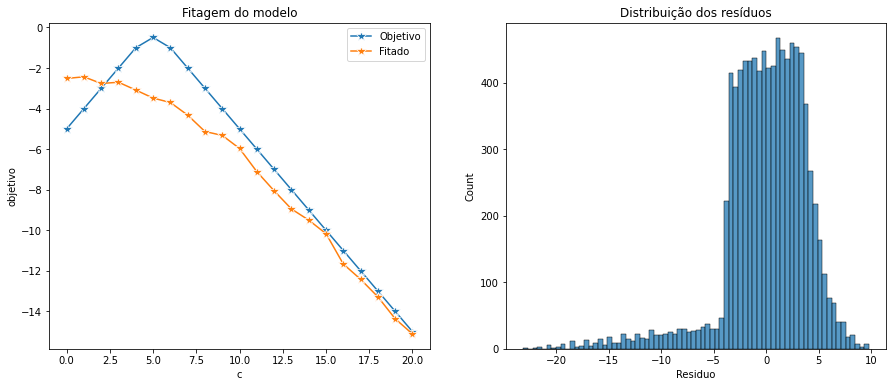

In [84]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.lineplot(data=results[(results['a'] == 10)&(results['b'] == 5)], x='c', y='objetivo', marker='*', ms=10, label='Objetivo')
sns.lineplot(data=results[(results['a'] == 10)&(results['b'] == 5)], x='c', y='fitado', marker='*', ms=10, label='Fitado')
plt.title('Fitagem do modelo')

plt.subplot(1,2,2)
sns.histplot(model.resid)
plt.title('Distribuição dos resíduos')
plt.xlabel('Residuo')
plt.show()

A partir dos resultados, conclui-se que:
1. A fitagem do modelo faz sentido, mas a não linearidade presente na função objetivo (quando a soma das alocações é diferente de 20) faz com que o modelo não seja tão preciso;
2. Pelo fato de a função objetivo ser assimétrica (vide plot célula abaixo), a variável de resíduos também é assimétrica.

Text(0.5, 1.0, 'Distribuição da variável objetivo')

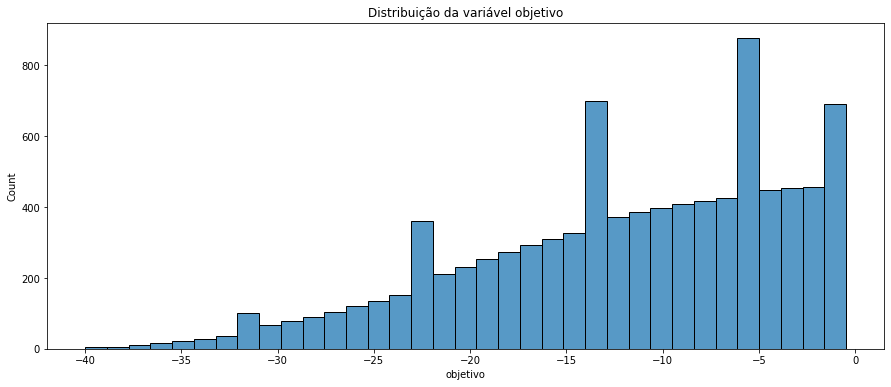

In [87]:
plt.figure(figsize=(15,6))
sns.histplot(data=results, x='objetivo')
plt.title('Distribuição da variável objetivo')

### 3.5 Conclusão

Assim, vimos que o RCBD e a tabela ANOVA nos permitiu identificar quais foram os fatores que influenciaram na variável resposta do problema e que, a partir do modelo de regressão linear proposto pelo RCBD, foi possível fitar razoavelmente a variável resposta. Além disso, a técnica contribuiu no entendimento do problema, como a limitação que a não-linearidade da variável objetivo gerou ou a não simetria dos resíduos devido à não simetria da variável objetivo.

Como o RCBD é a técnica de DOE mais popular entre as demais, usaremos apenas ela como aplicação, mas o encorajamos a aplicar as demais apresentadas ao problema em questão.
<u>Dica:</u> use as referências apresentadas em cada seção pra basear a aplicação.

## 4. Referências

* [Cavazzuti, Marco. (2013). Optimization methods: from theory to design](https://link.springer.com/book/10.1007/978-3-642-31187-1)